In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [217]:
### This defines the colours to use for the markers throughout. ###
f = 256
red1 = (192/f,21/f,52/f)
red2 = (144/f, 53/f, 56/f)
blue1 = (1/f,162/f,217/f)
blue2 = (130/f, 192/f, 233/f)
###

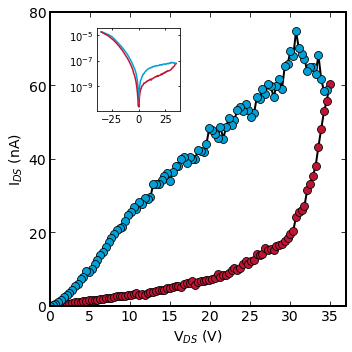

In [230]:
### Typical Switching IV

df = pd.read_csv('Data/KN 35V Sweep.csv')
x = df["CH1 Voltage"]
y = df["CH1 Current"]


### This specifies the index for the voltage range to be plotted. ###
mid = x.idxmax() + 1
stop = x[x == 0].index.values.astype(int)[1] + 1
###


fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)

ax.plot(x[start:mid], y[start:mid],
        marker = 'o',
        markersize = 8,
        mew = 0.8, 
        color = 'black', 
        linewidth = 2, 
        mfc = red1
        )

ax.plot(x[mid :stop], y[mid:stop],
        marker = 'o',
        markersize = 8, 
        mew = 0.8, 
        color = 'black', 
        linewidth = 2, 
        mfc = blue1
        )

scale_y = 1e-9
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

ax.tick_params(which = 'both', direction = 'in', top = 'on', right = 'on', left = 'on', bottom = 'on', labelsize = 14, size = 5)

ax.set_xlim([0, 37])
ax.set_ylim([0, 0.8e-7])

ax.set_yticks([0, 20e-9, 40e-9, 60e-9, 80e-9])
ax.set_xticks([0,5,10,15,20,25,30,35])

ax.set_xlabel("V$_{DS}$ (V)", fontsize = 14)
ax.set_ylabel("I$_{DS}$ (nA)", fontsize = 14)


plt.tight_layout()


######### Inset Plot ###########
mid2 = stop + mid - 1

ax2 = fig.add_axes([0.28,0.68,.23,.23])

ax2.plot(x[start:mid],abs(y[start:mid]), color = red1)
ax2.plot(x[mid:mid2],abs(y[mid:mid2]), color =  blue1)
ax2.plot(x[mid2:],abs(y[mid2:]), color = red1)

ax2.tick_params(which = 'both', direction = 'in', top = 'on', left = 'on', right = 'off', size = 2, labelsize = 10)
ax2.set_yscale('log')
###


#plt.savefig('Switching IV.png')



Conductivity in HRS = 3.255844155844156e-10
Conductivity in LRS = 1.959748822605966e-09
On/off Ratio = 6.02


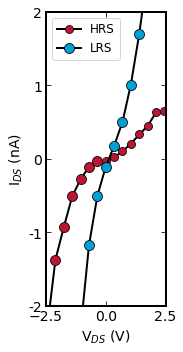

In [155]:
### Zero Bias Pinch-off ####

df = pd.read_csv('Data/KN 35V Sweep.csv')
x = df["CH1 Voltage"]
y = df["CH1 Current"]

fig = plt.figure(figsize = (2.5,5))
ax = fig.add_subplot(111)

ax.plot(x[:8],y[:8],
        marker = 'o',
        markersize = 8,
        mew = 0.8, 
        color = 'black', 
        linewidth = 2, 
        mfc = red1,
        label = 'HRS'
        )

ax.plot(x[192:209],y[192:209],
        marker = 'o',
        markersize = 10,
        mew = 0.8, 
        color = 'black', 
        linewidth = 2, 
        mfc = blue1,
        label = 'LRS'
        )

ax.plot(x[392:401],y[392:401],
        marker = 'o',
        markersize = 10,
        mew = 0.8, 
        color = 'black', 
        linewidth = 2, 
        mfc = red1,
        label = ''
        )


scale = 1e-9
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
ax.yaxis.set_major_formatter(ticks)

ax.set_xlabel('V$_{DS}$ (V)', fontsize = 14)
ax.set_ylabel('I$_{DS}$ (nA)', fontsize = 14)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

ax.tick_params(which = 'both', direction = 'in', top = 'on', right = 'on', left = 'on', bottom = 'on', labelsize = 14, size = 5)

ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2e-9, 2e-9])

ax.set_yticks([-2e-9, -1e-9, 0, 1e-9, 2e-9])

ax.legend(loc = 'upper left', fontsize = 12)

plt.tight_layout()

plt.savefig('Zero Bias Pinch off.png')

### Linear Fits ###
fitHRS = np.polyfit(x[:12], y[:12], 1)
fit_fn = np.poly1d(fitHRS)

fitLRS = np.polyfit(x[188:201], y[188:201], 1)
fit_fn2 = np.poly1d(fitLRS)

r = fitLRS/fitHRS
r = round(r[0],2)


print('Conductivity in HRS = %s' %fitHRS[0])
print('Conductivity in LRS = %s' %fitLRS[0])
print('On/off Ratio = %s' %r)

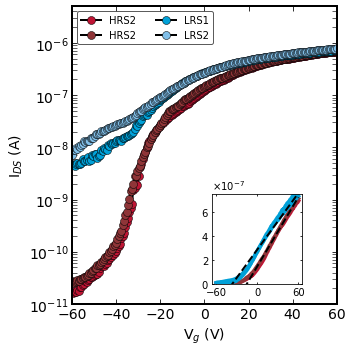

In [247]:
### Gate Sweeps

data_1 = pd.read_csv('Data/Gate Sweeps/KN 1V DS Gate Sweep_8_inLRS.csv')
data_2 = pd.read_csv('Data/Gate Sweeps/KN 1V DS Gate Sweep_10_inLRS.csv')
data_3 = pd.read_csv('Data/Gate Sweeps/KN 1V DS Gate Sweep_9_inHRS.csv')
data_4 = pd.read_csv('Data/Gate Sweeps/KN 1V DS Gate Sweep_11_inHRS.csv')
x = data_1["CH2 Voltage"]
LRS1 = data_1["CH1 Current"]
LRS2 = data_2["CH1 Current"]
HRS1 = data_3["CH1 Current"]
HRS2 = data_4["CH1 Current"]




fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)

ax.plot(x, HRS1, 
        marker = 'o',
        markersize = 8,
        mew = 0.5, 
        color = 'black', 
        linewidth = 2, 
        mfc = red1,
        label = "HRS2"
       )

ax.plot(x, HRS2, 
        marker = 'o', 
        markersize = 8, 
        mew = 0.5,
        color = 'black', 
        linewidth = 2, 
        mfc = red2, 
        label = "HRS2"
       )

ax.plot(x, LRS1, 
        marker = 'o', 
        markersize = 8, 
        mew = 0.5,
        color = 'black', 
        linewidth = 2, 
        mfc = blue1, 
        label = "LRS1"
       )

ax.plot(x, LRS2, 
        marker = 'o', 
        markersize = 8, 
        mew = 0.5,
        color = 'black', 
        linewidth = 2, 
        mfc = blue2, 
        label = "LRS2"
       )


ax.set_yscale("log")
ax.set_ylim([1e-11, 5e-6])
ax.set_xlim([-60,60])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

ax.tick_params(which = 'both', direction = 'in', top = 'on', right = 'on', left = 'on', bottom = 'on', labelsize = 14, size = 5)

ax.set_xlabel('V$_{g}$ (V)', fontsize = 14)
ax.set_ylabel('I$_{DS}$ (A)', fontsize = 14)

ax.legend(loc = "upper left", ncol = 2, fontsize = 10, edgecolor = '0.2')

plt.tight_layout()




######## Inset Plot ##########
ax2 = fig.add_axes([0.6,0.2, 0.25, 0.25])
ax2.plot(x, HRS1, color = red1, linewidth = 4)
ax2.plot(x, HRS2, color = red2, linewidth = 4)
ax2.plot(x, LRS1, color = blue1, linewidth = 4)
ax2.plot(x, LRS2, color = blue1, linewidth = 4)

ax2.tick_params(which = 'both', direction = 'in', top = 'on', right = 'on', length = 2, labelsize = 10)
ax2.ticklabel_format(style='sci', axis='y', useMathText = "true")
ax2.set_xticks([-60,0,60])
ax2.set_ylim([0,0.75e-6])


fitLRS2 = np.polyfit(x[90:], LRS1[90:], 1)
fit_fn = np.poly1d(fitLRS2)
ax2.plot(x[1:], fit_fn(x[1:]), '--', color = 'black', linewidth = 2)

fitHRS2 = np.polyfit(x[90:], HRS2[90:], 1)
fit_fn2 = np.poly1d(fitHRS2)
ax2.plot(x[1:], fit_fn2(x[1:]), '--',  color = 'black', linewidth = 2)
########



#plt.savefig('Gate Sweeps.png')


